## Exam Score 1 Vs Exam Score 2

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [85]:
data = np.loadtxt('new data/ex2data1.txt', delimiter=',')
np.random.shuffle(data)
print(f"Shape of the data is: {data.shape}")
print(data[1:4, :])

Shape of the data is: (100, 3)
[[74.775893   89.5298129   1.        ]
 [99.27252693 60.999031    1.        ]
 [58.84095622 75.85844831  1.        ]]


Text(0.5, 1.0, 'Admitted or Not')

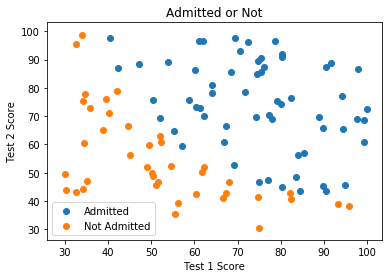

In [83]:
admitted_idx = data[:, 2] == 1
not_admitted_idx = data[:, 2] == 0

plt.scatter(data[admitted_idx, 0], data[admitted_idx, 1], label="Admitted")
plt.scatter(data[not_admitted_idx, 0], data[not_admitted_idx, 1], label="Not Admitted")
plt.legend()
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")
plt.title("Admitted or Not")

Text(0.5, 1.0, 'Testing')

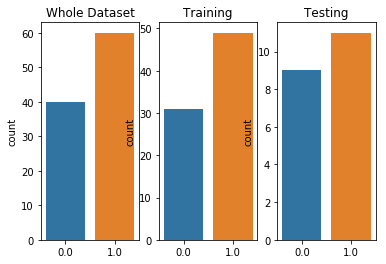

In [87]:
plt.subplot(1, 3, 1)
sns.countplot(data[:, 2],)
plt.title("Whole Dataset")

plt.subplot(1, 3, 2)
sns.countplot(Y_train.ravel())
plt.title("Training")

plt.subplot(1, 3, 3)
sns.countplot(Y_test.ravel())
plt.title("Testing")

In [86]:
X_train = data[:80, 0:2].T # To make it of shape (features, total_examples)
Y_train = data[:80, 2].reshape((1, 80))
X_test = data[80:, 0:2].T
Y_test = data[80:, 2].reshape((1, 20))
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2, 80) (1, 80) (2, 20) (1, 20)


- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyze the results and conclude

In [111]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    sigmoid(z)
    """
    return 1 / (1 + np.exp(-z))

def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)"""
    
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# w, b = initialize_params(2)
# print(f"Initial W: \n {w} \nInitial B: \n {b}")

## Forward and Backward Propagation

In [112]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (2, 1)
    b -- bias, a scalar
    X -- data of size (2, 80) Train
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    m_examples = X.shape[1]
    # Forward propagation
    activations = sigmoid(np.dot(w.T, X) + b) # compute ACTIVATIONS
    cost = (-1/m_examples) * np.sum(Y*np.log(activations) + (1 - Y) * (np.log(1 - activations))) # Compute COST
    dz = activations - Y
    dw = (1/m_examples) * np.dot(X, dz.T)
    db = (1/m_examples) * np.sum(dz)
    
    gradients = {"dw": dw, "db": db}
    return gradients, cost
    


- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.


In [48]:
def optimize(w, b, X, Y, iters, alpha, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    costs = []
    for i in range(iters):
        # Cost and Gradient Calculation
        grads, cost = propagate(w, b, X, Y)
        # Get the gradients
        dw = grads["dw"]
        db = grads["db"]
        # Update gradients
        w = w - (alpha * dw)
        b = b - (alpha * db)
        
        costs.append(cost)
        if i % 10 == 0:
            print(f"Cost after {i} iterations is {cost}")
            
    params = {"w":w, "b":b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs
    

In [36]:
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
#     print(A)
    for i in range(A.shape[1]):
        Y_pred[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_pred

In [149]:
def model(X_train, Y_train, X_test, Y_test, iters=200, alpha=0.001, print_cost=False):
    w, b = initialize_params(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, iters=iters, alpha=alpha, print_cost=print_cost)
    w = params["w"]
    b = params["b"]
    
    # Predict test/train
    Y_pred_train = predict(w, b, X_train)
    Y_pred_test = predict(w, b, X_test)
#     print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
#     print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
    print(f"Test accuracy: {100 * np.sum(Y_pred_test == Y_test)/Y_test.shape[1]}%")
    print(f"Train accuracy: {100 * np.sum(Y_pred_train == Y_train)/Y_train.shape[1]}%")
    
    res = {"costs": costs,
         "Y_pred_test": Y_pred_test, 
         "Y_pred_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": iters}
    
    return res

In [156]:
res = model(X_train, Y_train, X_test, Y_test, 200, 0.001, print_cost=True)

Cost after 0 iterations is 0.6931471805599454
Cost after 10 iterations is 0.6238368766335529
Cost after 20 iterations is 0.6202798229590867
Cost after 30 iterations is 0.6196360179331402
Cost after 40 iterations is 0.6194779489330378
Cost after 50 iterations is 0.619407171751116
Cost after 60 iterations is 0.6193520550164359
Cost after 70 iterations is 0.6192997347601769
Cost after 80 iterations is 0.6192479179867565
Cost after 90 iterations is 0.6191961978406035
Cost after 100 iterations is 0.6191445022985478
Cost after 110 iterations is 0.6190928186244846
Cost after 120 iterations is 0.619041144566584
Cost after 130 iterations is 0.6189894797258422
Cost after 140 iterations is 0.6189378240305822
Cost after 150 iterations is 0.6188861774669432
Cost after 160 iterations is 0.6188345400312767
Cost after 170 iterations is 0.6187829117217375
Cost after 180 iterations is 0.6187312925367987
Cost after 190 iterations is 0.6186796824749901
Test accuracy: 55.0%
Train accuracy: 61.25%


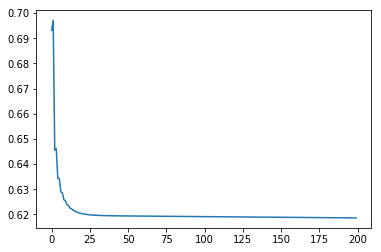

In [157]:
plt.plot(res['costs'])

In [155]:
res['Y_pred_train'] == 0

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]])

In [136]:
c = LogisticRegression()
c.fit(X_train.T, Y_train.ravel())
x = c.predict(X_test.T)
c.score(X_test.T, Y_test.ravel())
# np.sum(x == Y_test)/Y_test.shape[1]
c.get_params()

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}